In [4]:
import sys
import pandas as pd

from collections import defaultdict

import matplotlib

%matplotlib inline

In [5]:
sys.path.append('/home/lukasz/github/nlp/nlp-architect/examples/aspect_extraction/')
from aspect_extraction_test import get_aspect_datasets 

Using TensorFlow backend.


In [6]:
sys.path.append('/home/lukasz/github/nlp/nlp-architect/')
from nlp_architect.data.sequential_tagging import SequentialTaggingDataset

In [7]:
sys.path.append('/home/lukasz/github/phd/sentiment-backend/')
from aspects.preprocessing.conll import Conll, get_tag_frequency, process_conll_file

In [8]:
datasets = get_aspect_datasets()

100%|██████████| 2/2 [00:00<00:00, 148.85it/s]<00:00, 1767.14it/s]


In [9]:
def get_jaccard(t1, t2):
    t1, t2 = set(t1), set(t2)    
    return len(t1.intersection(t2))/len(t1.union(t2))

In [36]:
datasets_stats = defaultdict(dict)

min_tag_freq = 1
for dataset in datasets: 
    df_tag_freq_train = process_conll_file(dataset.train_file.as_posix())
    df_tag_freq_test = process_conll_file(dataset.test_file.as_posix())
    
    aspects_train = df_tag_freq_train.text.tolist()
    aspects_test = df_tag_freq_test.text.tolist()
    
    datasets_stats[dataset.name]['jaccard'] = get_jaccard(aspects_train, aspects_test)
#     datasets_stats[dataset.name]['unique_aspects'] = len(set(aspects_train).union(set(aspects_test)))
#     datasets_stats[dataset.name]['intersecting_aspects'] = len(set(aspects_train).intersection(set(aspects_test)))
#     datasets_stats[dataset.name]['unique_aspects_train'] = len(set(aspects_train))
#     datasets_stats[dataset.name]['unique_aspects_test'] = len(set(aspects_test))

100%|██████████| 800/800 [00:00<00:00, 141717.41it/s]


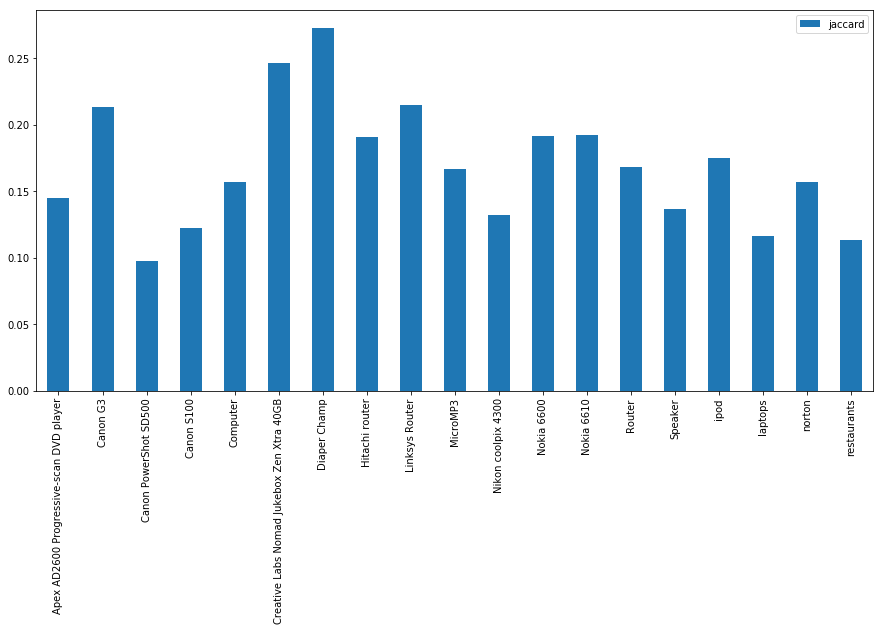

In [32]:
pd.DataFrame.from_dict(datasets_stats).T.sort_index(axis=0).plot(kind='bar', figsize=(15,7))

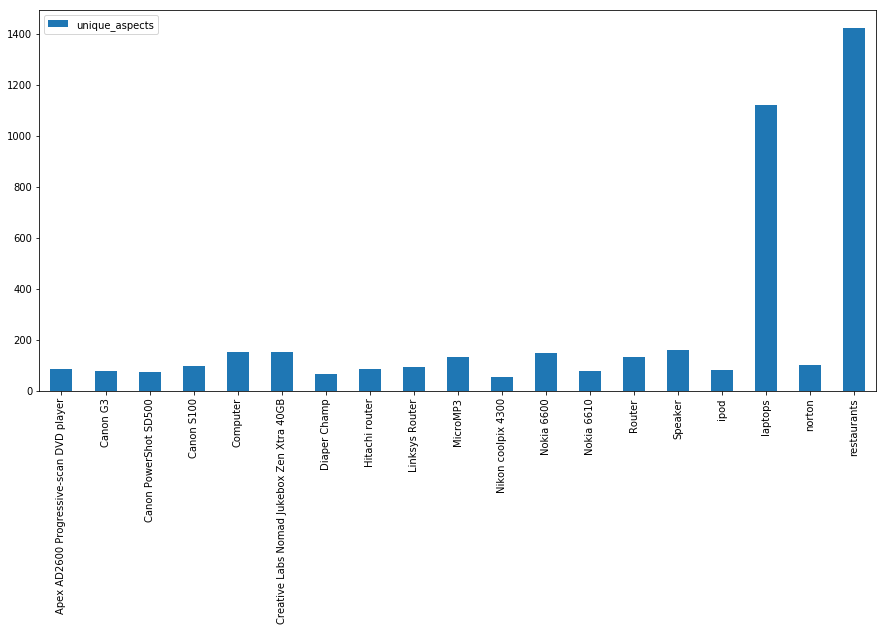

In [34]:
pd.DataFrame.from_dict(datasets_stats).T.sort_index(axis=0).plot(kind='bar', figsize=(15,7))

In [37]:
pd.DataFrame.from_dict(datasets_stats).T.sort_index(axis=1)

,jaccard
Apex AD2600 Progressive-scan DVD player,0.144578
Canon G3,0.213333
Canon PowerShot SD500,0.097222
Canon S100,0.122449
Computer,0.156863
Creative Labs Nomad Jukebox Zen Xtra 40GB,0.246667
Diaper Champ,0.272727
Hitachi router,0.190476
Linksys Router,0.215054
MicroMP3,0.166667
